In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv(r'results\fine_tune_coco\results.csv')
df.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,4174.81,0.52270,0.25546,1.09728,0.99139,0.97572,0.99311,0.85953,0.63294,0.27142,1.14548,0.001090,0.001090,0.001090
46,47,4216.99,0.50897,0.24706,1.08258,0.98962,0.97458,0.99284,0.86104,0.63688,0.27115,1.15307,0.000892,0.000892,0.000892
47,48,4261.06,0.49742,0.24222,1.07970,0.98968,0.97536,0.99387,0.86499,0.63391,0.26927,1.14956,0.000694,0.000694,0.000694
48,49,4305.71,0.49373,0.23843,1.07555,0.99145,0.98266,0.99399,0.86363,0.62742,0.26524,1.14502,0.000496,0.000496,0.000496
49,50,4355.75,0.48323,0.23502,1.06388,0.98651,0.98136,0.99350,0.86628,0.61913,0.26331,1.14387,0.000298,0.000298,0.000298


<Figure size 640x480 with 0 Axes>

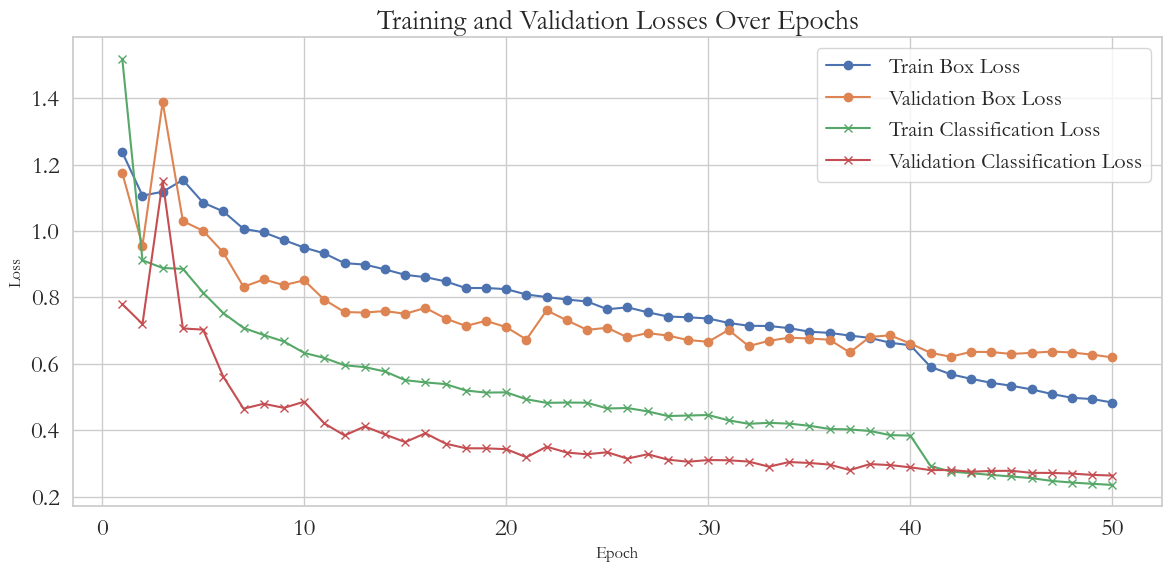

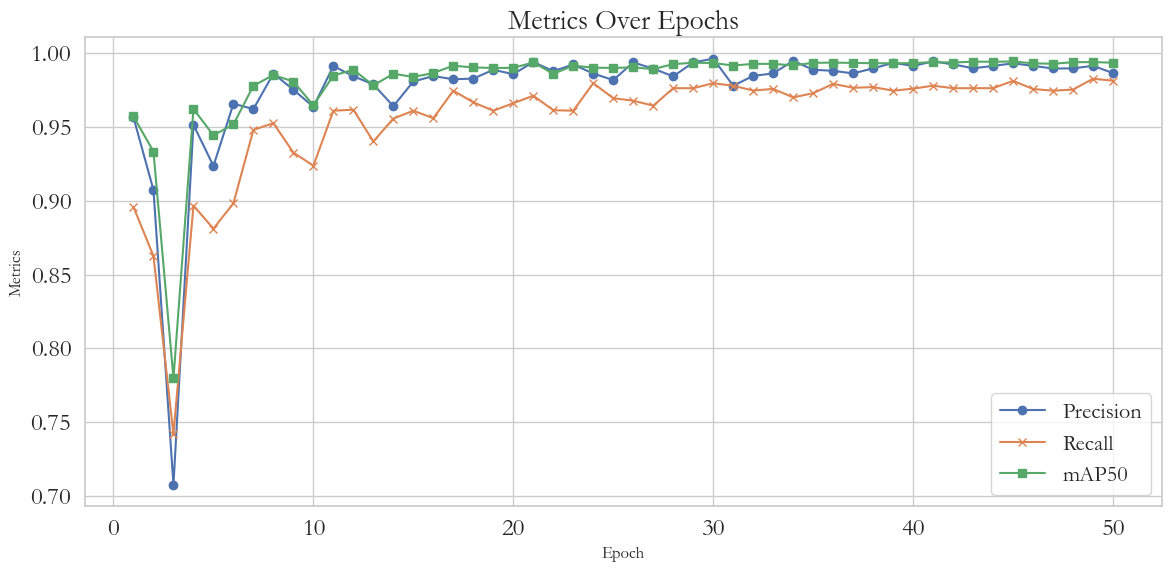

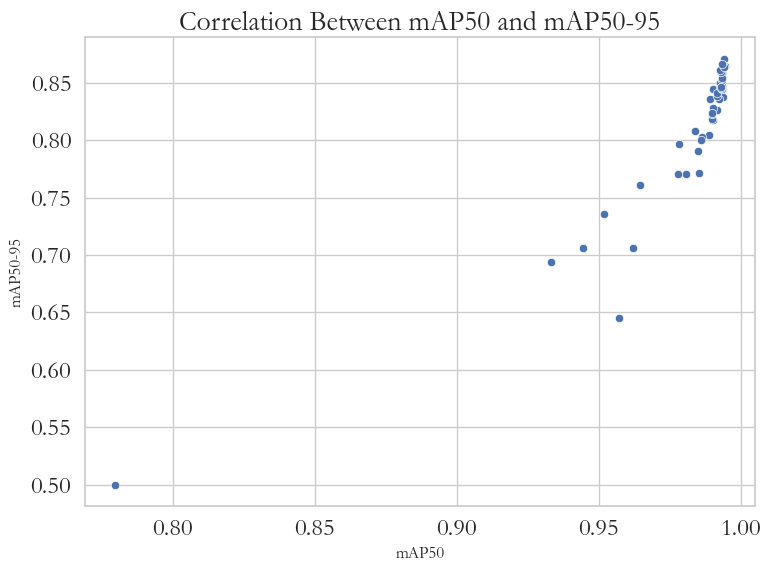

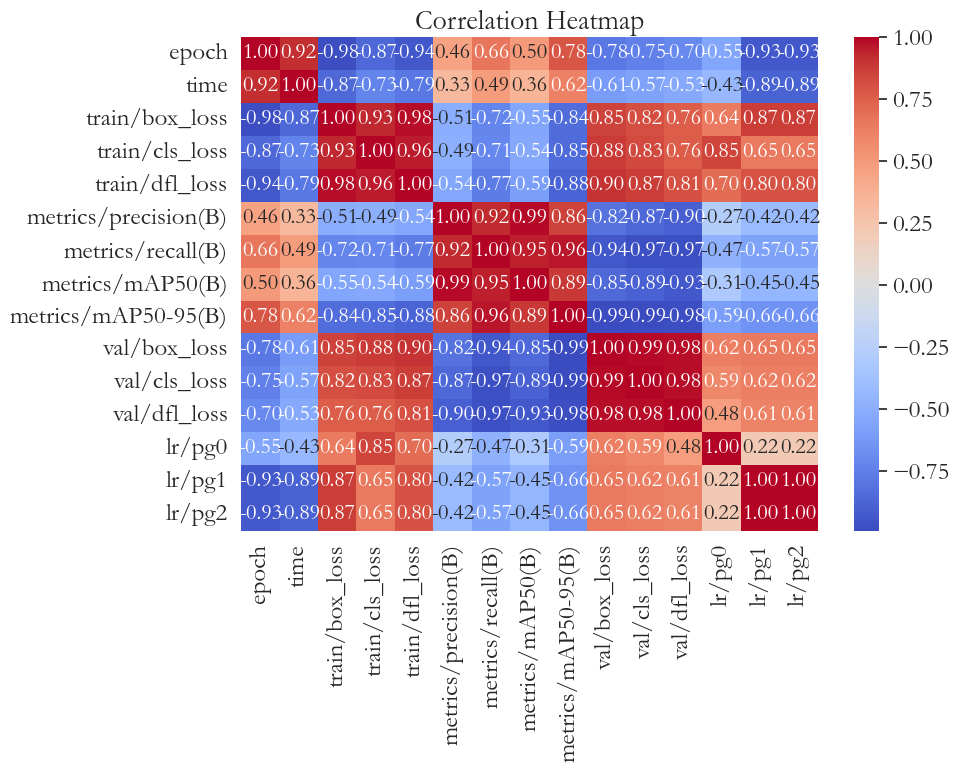

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,1779.379558,0.785727,0.506907,1.214544,0.976272,0.955536,0.981691,0.811971,0.746352,0.383895,1.230956,0.006956,0.004950,0.004950
std,14.57738,1594.813390,0.187210,0.227028,0.107561,0.042409,0.041527,0.032201,0.067552,0.149193,0.167466,0.138745,0.010718,0.002734,0.002734
min,1.00000,47.565400,0.483230,0.235020,1.063880,0.707460,0.741890,0.779680,0.499700,0.619130,0.263310,1.126550,0.000298,0.000298,0.000298
25%,13.25000,550.392250,0.679717,0.398697,1.142195,0.981075,0.957202,0.985468,0.800063,0.662240,0.291152,1.159137,0.002724,0.002724,0.002724
50%,25.50000,1050.640000,0.767120,0.466040,1.187600,0.986410,0.970620,0.991540,0.835755,0.697155,0.322910,1.185135,0.005149,0.004951,0.004951
75%,37.75000,3825.265000,0.895190,0.586610,1.268388,0.991375,0.976270,0.993382,0.853375,0.760407,0.389827,1.237492,0.007574,0.007178,0.007178
max,50.00000,4355.750000,1.237140,1.519120,1.540080,0.996290,0.982660,0.994400,0.870920,1.388680,1.150530,1.951490,0.070087,0.009595,0.009595


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
data = df.copy()

# Setting up the style for plots
sns.set(style="whitegrid")

# Summary statistics for the table
summary_table = data.describe()

# set font to gararamond
plt.rcParams['font.family'] = 'Garamond'
# font size to 16
plt.rcParams.update({'font.size': 16})

# title font size to 20
plt.rcParams.update({'axes.titlesize': 20})

# xlabel and ylabel font size to 18
plt.rcParams.update({'xtick.labelsize': 18})
plt.rcParams.update({'ytick.labelsize': 18})

# legend font size to 16
plt.rcParams.update({'legend.fontsize': 16})

# tight layout
plt.tight_layout()

# Displaying the summary table as a useful reference


# Plot 1: Training and validation losses over epochs
plt.figure(figsize=(12, 6))
plt.plot(data['epoch'], data['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(data['epoch'], data['val/box_loss'], label='Validation Box Loss', marker='o')
plt.plot(data['epoch'], data['train/cls_loss'], label='Train Classification Loss', marker='x')
plt.plot(data['epoch'], data['val/cls_loss'], label='Validation Classification Loss', marker='x')
plt.title('Training and Validation Losses Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

plt.savefig('results/webBasedimages/training_validation.png', dpi=600)
plt.show()

# Plot 2: Precision, Recall, and mAP50 over epochs
plt.figure(figsize=(12, 6))
plt.plot(data['epoch'], data['metrics/precision(B)'], label='Precision', marker='o')
plt.plot(data['epoch'], data['metrics/recall(B)'], label='Recall', marker='x')
plt.plot(data['epoch'], data['metrics/mAP50(B)'], label='mAP50', marker='s')
plt.title('Metrics Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
# tight layout
plt.tight_layout()
plt.savefig('results/webBasedimages/accuracy_metrics.png', dpi=600)

plt.show()

# Plot 3: mAP50-95 vs mAP50 correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['metrics/mAP50(B)'], y=data['metrics/mAP50-95(B)'])
plt.title('Correlation Between mAP50 and mAP50-95')
plt.xlabel('mAP50')
plt.ylabel('mAP50-95')
plt.tight_layout()

plt.savefig('results/webBasedimages/correlation.png', dpi=600)

plt.show()

# Plot 4: Heatmap for correlations between metrics and losses
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()

plt.savefig('results/webBasedimages/heatmap.png', dpi=600)

plt.show()

# Displaying the summary table as a useful reference
summary_table


In [42]:
summary_table

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,1779.379558,0.785727,0.506907,1.214544,0.976272,0.955536,0.981691,0.811971,0.746352,0.383895,1.230956,0.006956,0.004950,0.004950
std,14.57738,1594.813390,0.187210,0.227028,0.107561,0.042409,0.041527,0.032201,0.067552,0.149193,0.167466,0.138745,0.010718,0.002734,0.002734
min,1.00000,47.565400,0.483230,0.235020,1.063880,0.707460,0.741890,0.779680,0.499700,0.619130,0.263310,1.126550,0.000298,0.000298,0.000298
25%,13.25000,550.392250,0.679717,0.398697,1.142195,0.981075,0.957202,0.985468,0.800063,0.662240,0.291152,1.159137,0.002724,0.002724,0.002724
50%,25.50000,1050.640000,0.767120,0.466040,1.187600,0.986410,0.970620,0.991540,0.835755,0.697155,0.322910,1.185135,0.005149,0.004951,0.004951
75%,37.75000,3825.265000,0.895190,0.586610,1.268388,0.991375,0.976270,0.993382,0.853375,0.760407,0.389827,1.237492,0.007574,0.007178,0.007178
max,50.00000,4355.750000,1.237140,1.519120,1.540080,0.996290,0.982660,0.994400,0.870920,1.388680,1.150530,1.951490,0.070087,0.009595,0.009595


### plot for verification

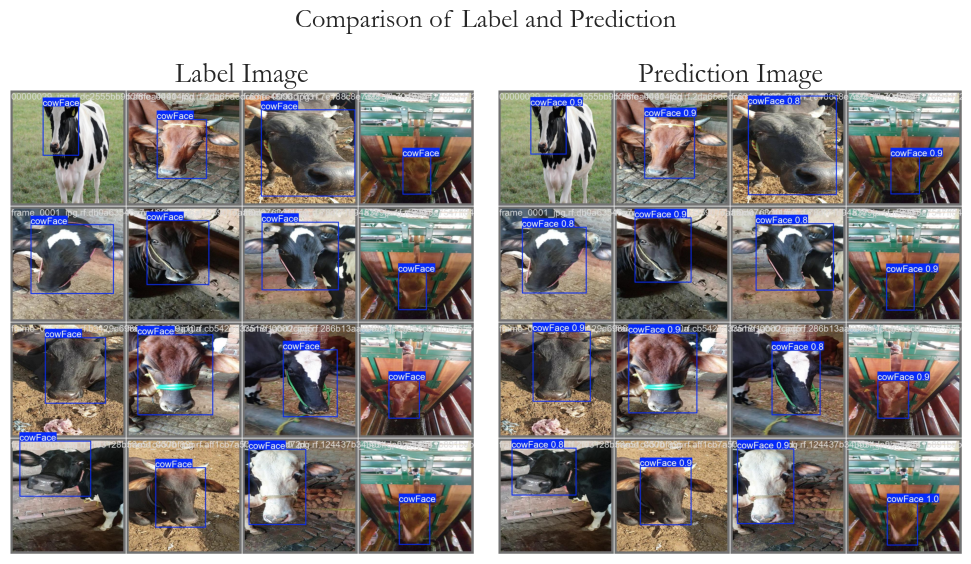

In [41]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_images(label_image_path, prediction_image_path, title="Label and Prediction Comparison"):
    # Open images using PIL
    label_image = Image.open(label_image_path)
    prediction_image = Image.open(prediction_image_path)

    # Convert images to numpy arrays for plotting
    label_image = np.array(label_image)
    prediction_image = np.array(prediction_image)

    # Ensure the images are the same size (resize if needed)
    if label_image.shape != prediction_image.shape:
        prediction_image = np.array(prediction_image.resize((label_image.shape[1], label_image.shape[0])))

    # Create a figure and axis for displaying
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))

    # Display labeled image on the left
    axes[0].imshow(label_image, cmap='jet')
    axes[0].set_title('Label Image', fontname='Garamond')
    axes[0].axis('off')  # Hide axes for a cleaner look

    # Display prediction image on the right
    axes[1].imshow(prediction_image, cmap='jet')
    # set font style to garamond
    axes[1].set_title('Prediction Image', fontname='Garamond')
    axes[1].axis('off')  # Hide axes for a cleaner look

    # Set a common title for both images
    fig.suptitle(title,  fontname='Garamond')

    # Show the plot
    plt.tight_layout()
    plt.savefig('results/webBasedimages/val_batch0_comparison.jpg', dpi=600)
    plt.show()

# Example usage:
label_image_path = r'results\fine_tune_coco2\val_batch0_labels.jpg'  # Path to label image
prediction_image_path = r'results\fine_tune_coco2\val_batch0_pred.jpg'  # Path to prediction image

plot_images(label_image_path, prediction_image_path, title="Comparison of Label and Prediction")


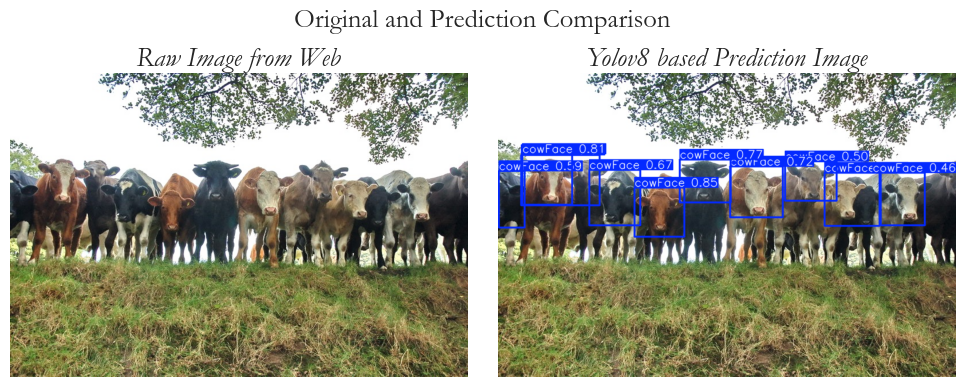

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_images(label_image_path, prediction_image_path, title="Original and Prediction Comparison"):
    # Open images using PIL
    label_image = Image.open(label_image_path)
    prediction_image = Image.open(prediction_image_path)

    # Convert images to numpy arrays for plotting
    label_image = np.array(label_image)
    prediction_image = np.array(prediction_image)

    # Ensure the images are the same size (resize if needed)
    if label_image.shape != prediction_image.shape:
        prediction_image = np.array(prediction_image.resize((label_image.shape[1], label_image.shape[0])))

    # Create a figure and axis for displaying
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Display labeled image on the left
    axes[0].imshow(label_image, cmap='jet')
    axes[0].set_title('Raw Image from Web', fontname='Garamond')
    axes[0].axis('off')  # Hide axes for a cleaner look

    # Display prediction image on the right
    axes[1].imshow(prediction_image, cmap='jet')
    # set font style to garamond
    axes[1].set_title('Yolov8 based Prediction Image',  fontname='Garamond')
    axes[1].axis('off')  # Hide axes for a cleaner look

    # Set a common title for both images
    fig.suptitle(title,  fontname='Garamond')

    # Show the plot
    plt.tight_layout()
    plt.savefig('results/webBasedimages/orignal_prediction.jpg', dpi=600)
    plt.show()

# Example usage:
label_image_path = r'results\webBasedimages\multiple_cowsWatching_us.png'  # Path to label image
prediction_image_path = r'results\webBasedimages\results_multiple_cowsWatching_us.png'  # Path to prediction image

plot_images(label_image_path, prediction_image_path)


